In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [8]:
from google.colab import files
uploaded = files.upload()

Saving The-Global-K-anon-Dataset-15-July-2021.csv to The-Global-K-anon-Dataset-15-July-2021.csv


In [10]:
df = pd.read_csv('The-Global-K-anon-Dataset-15-July-2021.csv')
df.head()

/tmp/ipython-input-10-30761964.py:1: DtypeWarning: Columns (6,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('The-Global-K-anon-Dataset-15-July-2021.csv')


,By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityStatusAtExploit,majorityEntry,citizenship,meansOfControlDebtBondage,...,typeOfSexPrivateSexualServices,typeOfSexConcatenated,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
0,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
1,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
2,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
3,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0
4,NaN,2002.0,Case Management,Female,18--20,Adult,NaN,NaN,CO,NaN,...,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,1.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97750 entries, 0 to 97749
Data columns (total 64 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use  0 non-null      float64
 1   yearOfRegistration                                                                               95739 non-null  float64
 2   Datasource                                                                                       97750 non-null  object 
 3   gender                                                                                           89612 non-null  object 
 4   ageBroad                                                                                         50967 non-null  object 
 5   majo

/tmp/ipython-input-13-4294355123.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_country, x='citizenship', y='jumlah_kasus', palette='viridis')


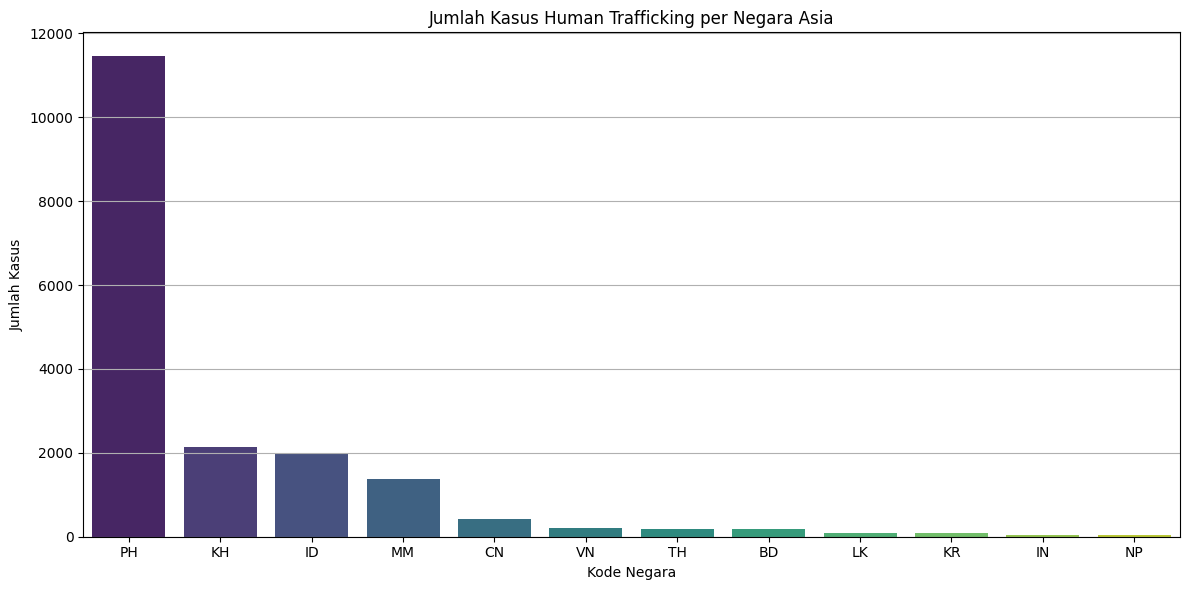

   citizenship  jumlah_kasus
0           PH         11454
1           KH          2130
2           ID          1999
3           MM          1382
4           CN           419
5           VN           200
6           TH           178
7           BD           176
8           LK            85
9           KR            84
10          IN            50
11          NP            39


In [13]:
# STEP 3: Filter Negara Asia Berdasarkan ISO
asia_iso = ['ID', 'MY', 'TH', 'PH', 'VN', 'IN', 'PK', 'BD', 'KH', 'CN', 'JP', 'KR', 'SG', 'NP', 'MM', 'LK']
df_asia = df[df['citizenship'].isin(asia_iso)]

# STEP 4: Cleaning Data
# Drop kolom yang semua isinya kosong
df_asia_clean = df_asia.dropna(axis=1, how='all')
# Hapus baris yang tidak memiliki yearOfRegistration
df_asia_clean = df_asia_clean.dropna(subset=['yearOfRegistration'])

# STEP 5: Hitung Jumlah Kasus per Negara
df_country = df_asia_clean.groupby('citizenship').size().reset_index(name='jumlah_kasus')
df_country = df_country.sort_values(by='jumlah_kasus', ascending=False)

# STEP 6: Visualisasi
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(data=df_country, x='citizenship', y='jumlah_kasus', palette='viridis')
plt.title('Jumlah Kasus Human Trafficking per Negara Asia')
plt.xlabel('Kode Negara')
plt.ylabel('Jumlah Kasus')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# STEP 7: Tampilkan Tabel Ringkasan
print(df_country.reset_index(drop=True))

In [25]:
asean_countries = ['ID', 'MY', 'SG', 'TH', 'VN', 'PH', 'BN', 'MM', 'KH', 'LA']

# Filter hanya baris yang termasuk negara ASEAN
df_asean = df[df['citizenship'].isin(asean_countries)]

# Cleaning dasar
df_asean.drop_duplicates(inplace=True)
df_asean = df_asean[df_asean['citizenship'].notna()]
df_asean = df_asean[df_asean['yearOfRegistration'].notna()]
df_asean['yearOfRegistration'] = df_asean['yearOfRegistration'].astype(int)

# Lihat 5 data teratas
print(df_asean.head())

      By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use  \
2650                                                NaN                                                 
3431                                                NaN                                                 
3454                                                NaN                                                 
3471                                                NaN                                                 
3473                                                NaN                                                 

      yearOfRegistration       Datasource  gender ageBroad majorityStatus  \
2650                2005  Case Management  Female   30--38          Adult   
3431                2006  Case Management  Female   18--20          Adult   
3454                2006  Case Management  Female   18--20          Adult   
3471                2006  Case Management  Female   18--20   

/tmp/ipython-input-25-3211200280.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
# Cek jumlah nilai NaN per kolom
missing_values = df_asean.isna().sum()
print("Jumlah NaN per kolom:")
print(missing_values[missing_values > 0])


Jumlah NaN per kolom:
Series([], dtype: int64)


In [27]:
# Contoh: Drop kolom yang terlalu banyak NaN (> 70%)
threshold = 0.7
cols_to_drop = missing_values[missing_values > threshold * len(df_asean)].index
df_asean.drop(columns=cols_to_drop, inplace=True)
print(f"\nKolom yang dibuang karena terlalu banyak NaN:\n{cols_to_drop.tolist()}")

# Isi sisa NaN numerik dengan median
num_cols = df_asean.select_dtypes(include='number').columns
df_asean[num_cols] = df_asean[num_cols].fillna(df_asean[num_cols].median())

# Isi NaN kategorikal dengan modus
cat_cols = df_asean.select_dtypes(include='object').columns
for col in cat_cols:
    if df_asean[col].isna().sum() > 0:
        mode_val = df_asean[col].mode().iloc[0]
        df_asean[col].fillna(mode_val, inplace=True)

# Cek ulang NaN
print("\nJumlah NaN setelah dibersihkan:")
print(df_asean.isna().sum().sum())  # total seluruh NaN



Kolom yang dibuang karena terlalu banyak NaN:
['By using this data you agree to the Terms of Use: https://www.ctdatacollaborative.org/terms-use', 'majorityStatusAtExploit', 'meansOfControlRestrictsFinancialAccess', 'meansOfControlUsesChildren', 'typeOfSexPornography', 'typeOfSexRemoteInteractiveServices', 'typeOfSexPrivateSexualServices', 'typeOfSexConcatenated']

Jumlah NaN setelah dibersihkan:
0


/tmp/ipython-input-27-221835439.py:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [30]:
df_asean.head(10)

,yearOfRegistration,Datasource,gender,ageBroad,majorityStatus,majorityEntry,citizenship,meansOfControlDebtBondage,meansOfControlTakesEarnings,meansOfControlThreats,...,typeOfLabourConcatenated,typeOfSexProstitution,isAbduction,RecruiterRelationship,CountryOfExploitation,recruiterRelationIntimatePartner,recruiterRelationFriend,recruiterRelationFamily,recruiterRelationOther,recruiterRelationUnknown
2650,2005,Case Management,Female,30--38,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3431,2006,Case Management,Female,18--20,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3454,2006,Case Management,Female,18--20,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3471,2006,Case Management,Female,18--20,Adult,Adult,ID,0.0,0.0,0.0,...,Not specified,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3473,2006,Case Management,Female,18--20,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3733,2006,Case Management,Female,21--23,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3739,2006,Case Management,Female,21--23,Adult,Adult,ID,0.0,0.0,0.0,...,Other;Not specified,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3747,2006,Case Management,Female,21--23,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3771,2006,Case Management,Female,21--23,Adult,Adult,ID,0.0,0.0,0.0,...,Domestic work,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0
3772,2006,Case Management,Female,21--23,Adult,Adult,ID,0.0,0.0,0.0,...,Other;Not specified,0.0,0.0,Other,MY,0.0,0.0,0.0,0.0,1.0


In [35]:
# Tampilkan 3 baris pertama dari tiap negara
for code in asean_countries:
    print(f"\n==== {code} ====")
    print(df_asean[df_asean['citizenship'] == code].head(3))



==== ID ====
      yearOfRegistration       Datasource  gender ageBroad majorityStatus  \
2650                2005  Case Management  Female   30--38          Adult   
3431                2006  Case Management  Female   18--20          Adult   
3454                2006  Case Management  Female   18--20          Adult   

     majorityEntry citizenship  meansOfControlDebtBondage  \
2650         Adult          ID                        0.0   
3431         Adult          ID                        0.0   
3454         Adult          ID                        0.0   

      meansOfControlTakesEarnings  meansOfControlThreats  ...  \
2650                          0.0                    0.0  ...   
3431                          0.0                    0.0  ...   
3454                          0.0                    0.0  ...   

      typeOfLabourConcatenated  typeOfSexProstitution  isAbduction  \
2650             Domestic work                    0.0          0.0   
3431             Domestic work 

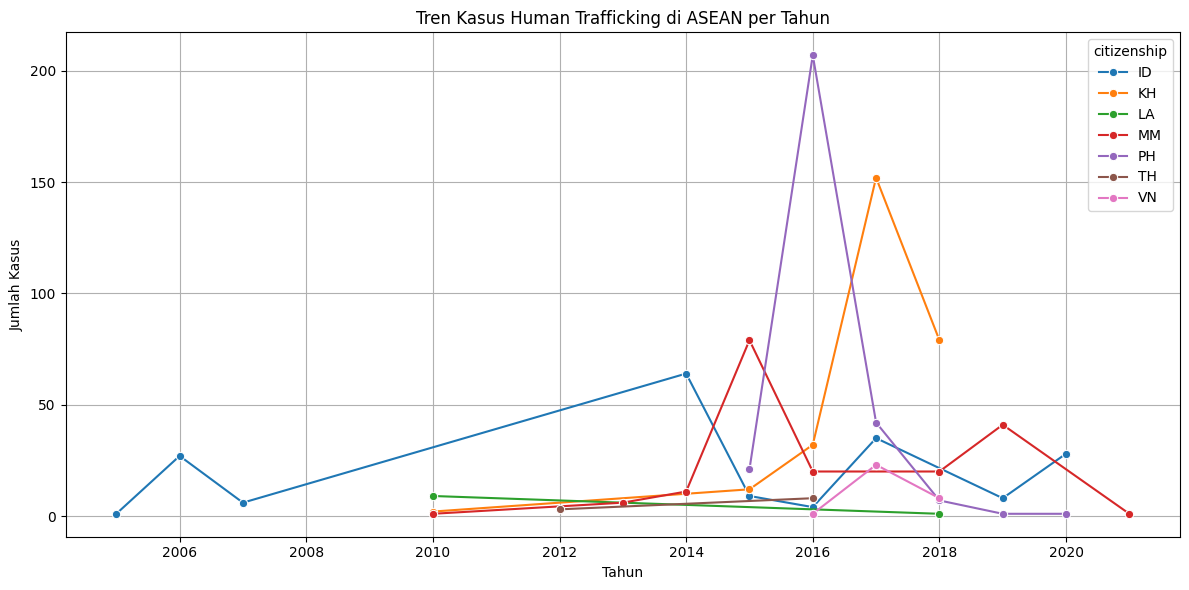

In [38]:
# Hitung jumlah kasus per tahun per negara
trend = df_asean.groupby(['citizenship', 'yearOfRegistration']).size().reset_index(name='jumlah_kasus')

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend, x='yearOfRegistration', y='jumlah_kasus', hue='citizenship', marker='o')
plt.title("Tren Kasus Human Trafficking di ASEAN per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Kasus")
plt.grid(True)
plt.tight_layout()
plt.show()


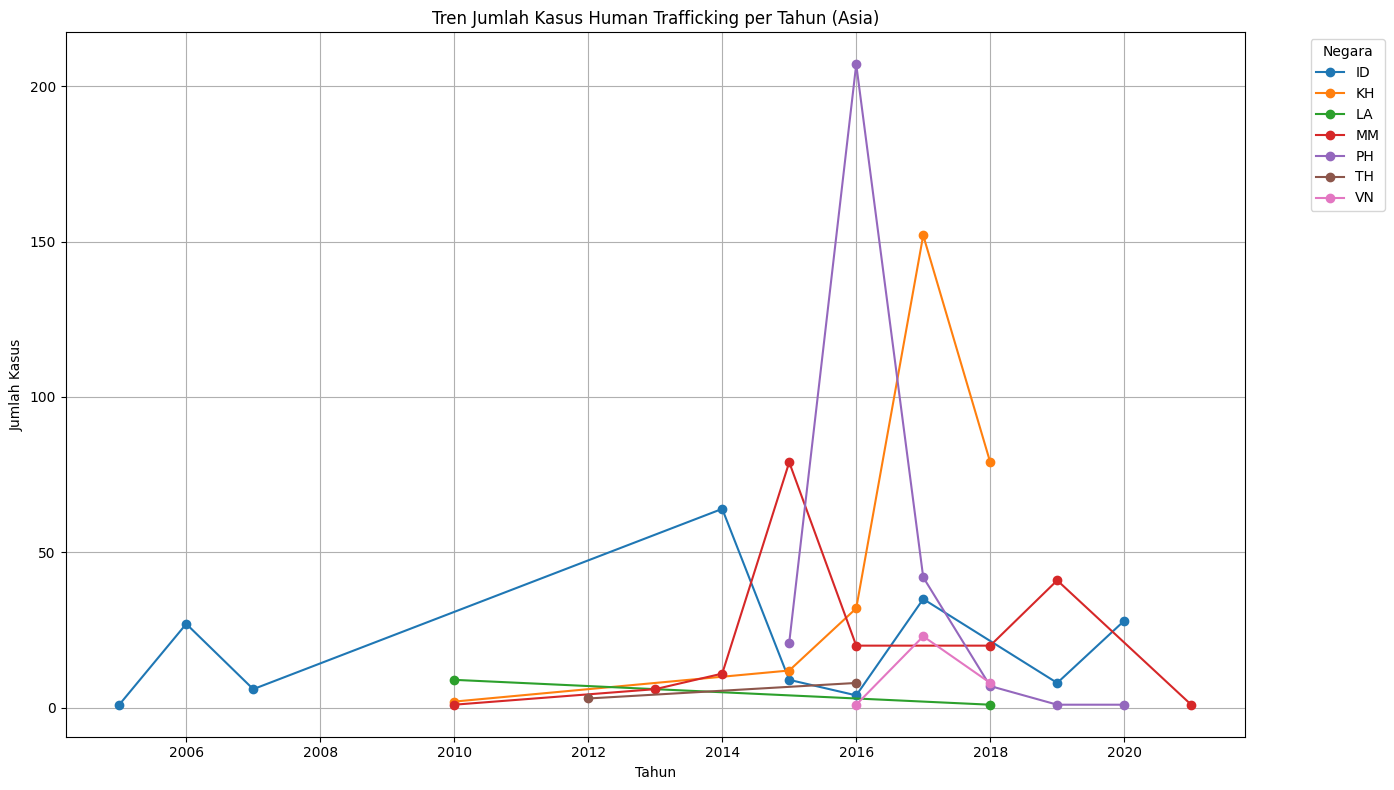

In [36]:
# STEP 8: Buat Data Jumlah Kasus per Tahun per Negara
df_trend = df_asean.groupby(['citizenship', 'yearOfRegistration']).size().reset_index(name='jumlah_kasus')

# STEP 9: Visualisasi Tren Kasus per Tahun untuk Masing-masing Negara Asia
import matplotlib.pyplot as plt

# Tentukan ukuran grafik
plt.figure(figsize=(14, 8))

# Loop tiap negara dan plot trennya
for negara in df_trend['citizenship'].unique():
    data_negara = df_trend[df_trend['citizenship'] == negara]
    plt.plot(data_negara['yearOfRegistration'], data_negara['jumlah_kasus'], marker='o', label=negara)

plt.title('Tren Jumlah Kasus Human Trafficking per Tahun (Asia)')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.legend(title='Negara', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


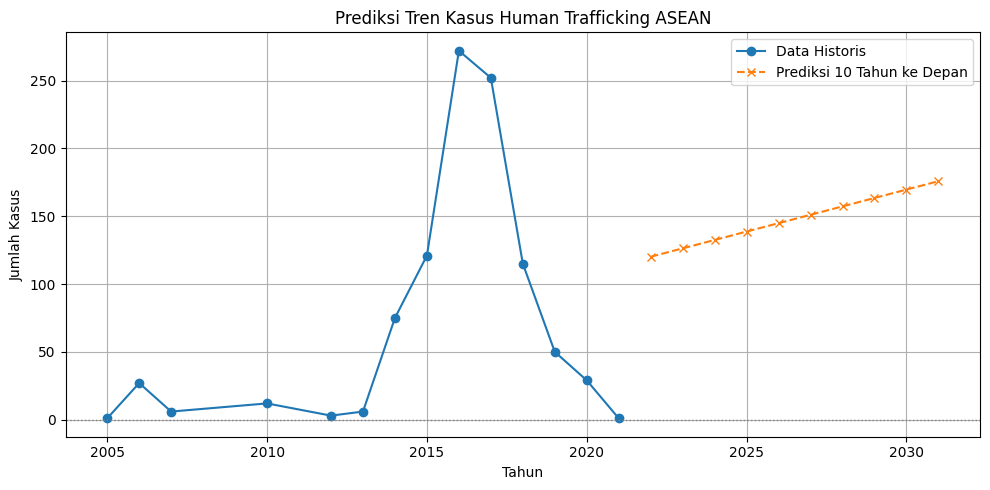

   Tahun  Prediksi Jumlah Kasus
0   2022                    120
1   2023                    126
2   2024                    132
3   2025                    139
4   2026                    145
5   2027                    151
6   2028                    157
7   2029                    163
8   2030                    170
9   2031                    176


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Hitung jumlah kasus per tahun
asean_trend = df_asean.groupby('yearOfRegistration').size().reset_index(name='jumlah_kasus')

# Siapkan data untuk regresi
X_years = asean_trend['yearOfRegistration'].values.reshape(-1, 1)
y_cases = asean_trend['jumlah_kasus'].values

# Buat model Linear Regression
model = LinearRegression()
model.fit(X_years, y_cases)

# Prediksi 10 tahun ke depan
tahun_maks = asean_trend['yearOfRegistration'].max()
tahun_prediksi = np.arange(tahun_maks + 1, tahun_maks + 11).reshape(-1, 1)
prediksi_kasus = model.predict(tahun_prediksi)

# Gabungkan data historis dan prediksi
tahun_semua = np.concatenate((X_years, tahun_prediksi))
kasus_semua = np.concatenate((y_cases, prediksi_kasus))

# Visualisasi tren historis dan prediksi
plt.figure(figsize=(10, 5))
plt.plot(X_years, y_cases, label='Data Historis', marker='o')
plt.plot(tahun_prediksi, prediksi_kasus, label='Prediksi 10 Tahun ke Depan', linestyle='--', marker='x')
plt.axhline(0, color='gray', linestyle=':', linewidth=1)
plt.title('Prediksi Tren Kasus Human Trafficking ASEAN')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kasus')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Cetak prediksi
hasil_prediksi = pd.DataFrame({
    'Tahun': tahun_prediksi.flatten(),
    'Prediksi Jumlah Kasus': np.round(prediksi_kasus).astype(int)
})
print(hasil_prediksi)


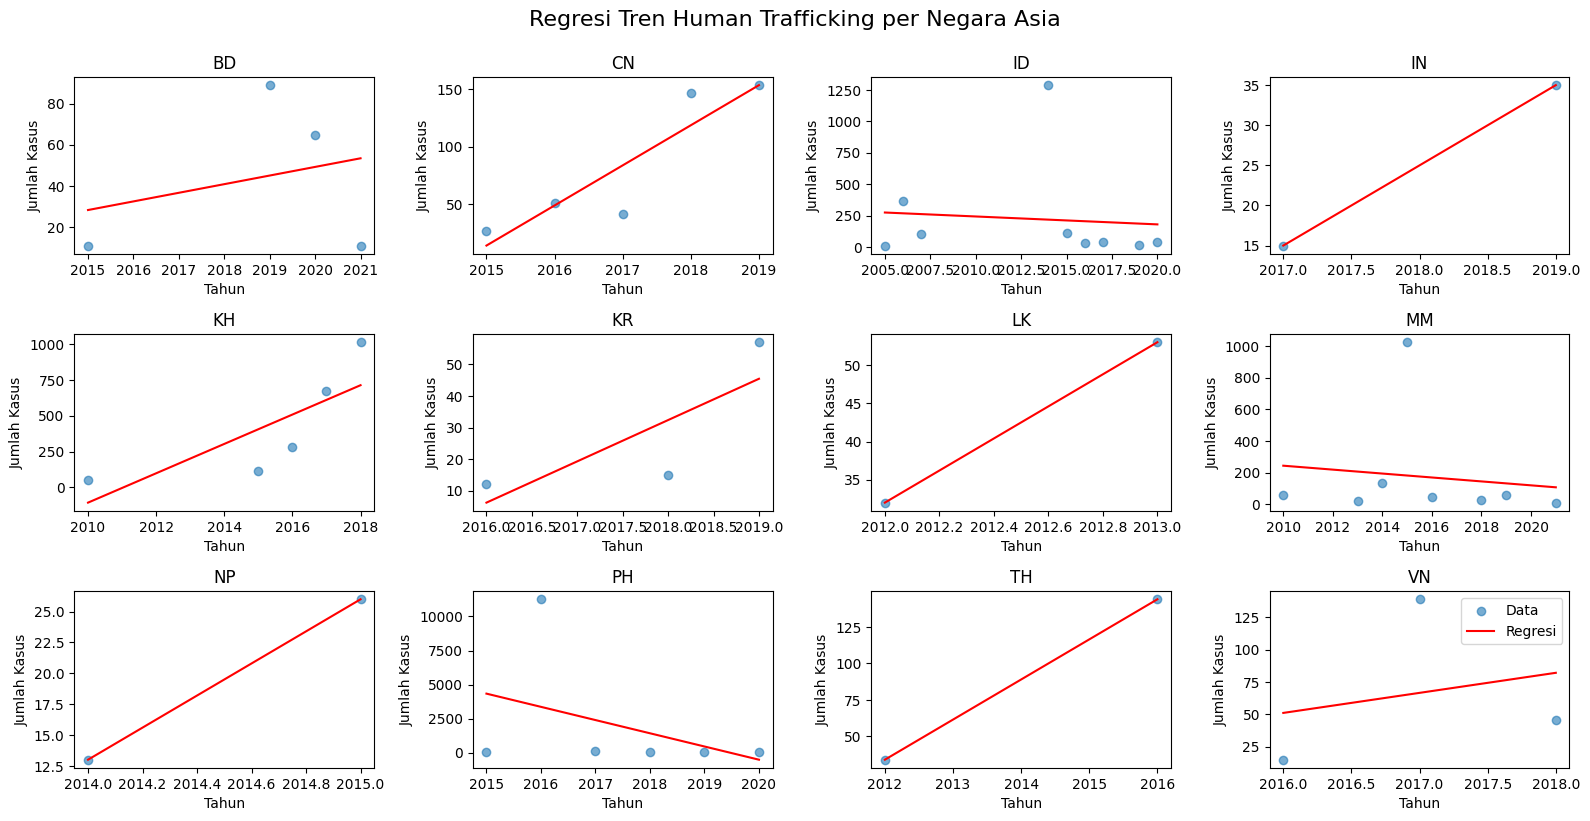

  Negara  Perkiraan Tahun Kasus ~1
0     PH                    2019.0
1     MM                    2029.0
2     ID                    2048.0


/tmp/ipython-input-16-2218053700.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  hasil_prediksi['Perkiraan Tahun Kasus ~1'] = hasil_prediksi['Perkiraan Tahun Kasus ~1'].replace("Tidak Menurun", np.nan)


In [16]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataframe untuk menyimpan prediksi
prediksi_tahun = {}

plt.figure(figsize=(16, 10))

# Loop tiap negara Asia
for idx, negara in enumerate(df_trend['citizenship'].unique()):
    data_negara = df_trend[df_trend['citizenship'] == negara]

    X = data_negara['yearOfRegistration'].values.reshape(-1, 1)
    y = data_negara['jumlah_kasus'].values

    if len(X) > 1:
        model = LinearRegression()
        model.fit(X, y)

        slope = model.coef_[0]
        intercept = model.intercept_

        # Hitung kapan jumlah kasus ~1 jika tren menurun
        if slope < 0:
            # Avoid division by zero or very small numbers if slope is near zero
            if abs(slope) > 1e-9:
                target_year = int((1 - intercept) / slope)
                prediksi_tahun[negara] = target_year
            else:
                 prediksi_tahun[negara] = "Tidak Menurun" # Treat very flat negative slope as not decreasing
        else:
            prediksi_tahun[negara] = "Tidak Menurun"

        # Plot tren
        plt.subplot(4, 4, idx + 1)
        plt.scatter(X, y, alpha=0.6, label="Data")
        plt.plot(X, model.predict(X), color='red', label='Regresi')
        plt.title(f"{negara}")
        plt.xlabel("Tahun")
        plt.ylabel("Jumlah Kasus")
        plt.tight_layout()

plt.suptitle("Regresi Tren Human Trafficking per Negara Asia", fontsize=16, y=1.03)
plt.legend()
plt.show()

# Tabel Hasil Prediksi Tahun
hasil_prediksi = pd.DataFrame(list(prediksi_tahun.items()), columns=["Negara", "Perkiraan Tahun Kasus ~1"])

# Convert "Tidak Menurun" to NaN for sorting, then drop NaN for sorting
hasil_prediksi['Perkiraan Tahun Kasus ~1'] = hasil_prediksi['Perkiraan Tahun Kasus ~1'].replace("Tidak Menurun", np.nan)
hasil_prediksi.sort_values("Perkiraan Tahun Kasus ~1", inplace=True, na_position="last")
print(hasil_prediksi.dropna().reset_index(drop=True)) # Print only rows with predictions

World map loaded successfully.


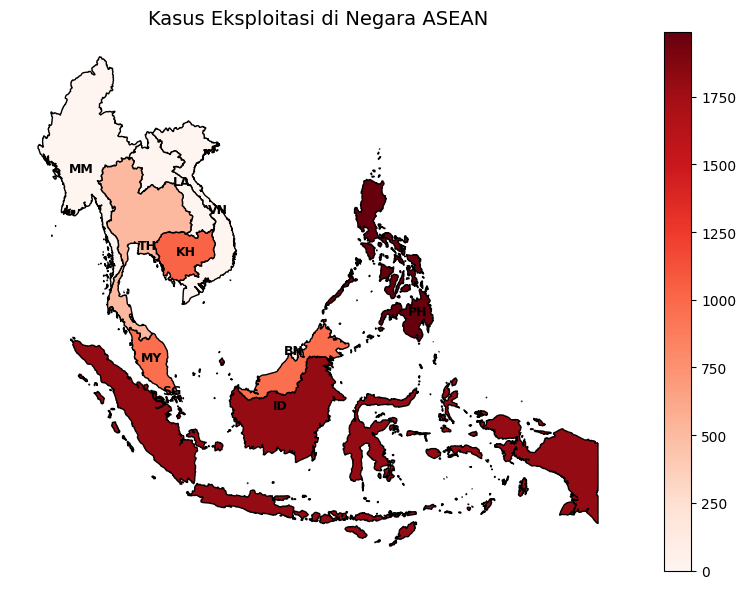

In [66]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# STEP 1: Ambil data negara dari URL GeoJSON
url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
try:
    world = gpd.read_file(url)
    print("World map loaded successfully.")
except Exception as e:
    print(f"Error loading world map: {e}")
    world = None

# STEP 2: Data eksploitasi ASEAN
asean_cases = {
    'ID': 1805,
    'MY': 966,
    'KH': 1029,
    'PH': 1988,
    'TH': 505
}
cases_df = pd.DataFrame(list(asean_cases.items()), columns=['iso_a2', 'cases'])

# STEP 3: Rename kolom ISO jika ada
if world is not None and 'ISO3166-1-Alpha-2' in world.columns:
    world = world.rename(columns={'ISO3166-1-Alpha-2': 'iso_a2'})

# STEP 4: Filter negara ASEAN & merge
asean_countries = ['ID', 'MY', 'SG', 'TH', 'VN', 'PH', 'BN', 'MM', 'KH', 'LA']
if world is not None and 'iso_a2' in world.columns:
    world_asean = world[world['iso_a2'].isin(asean_countries)].copy()
    asean_map = world_asean.merge(cases_df, on='iso_a2', how='left')

    # Perbaiki geometri & isi 0 untuk negara ASEAN yang tidak ada kasus
    asean_map['geometry'] = asean_map['geometry'].buffer(0)
    asean_map['cases'] = asean_map['cases'].fillna(0)

    # PLOT ASEAN SAJA
    fig, ax = plt.subplots(figsize=(8, 6))
    asean_map.plot(ax=ax, column='cases', cmap='Reds', legend=True, edgecolor='black')

    for idx, row in asean_map.iterrows():
        if not row.geometry.is_empty:
            point = row.geometry.representative_point()
            plt.text(point.x, point.y, row['iso_a2'], fontsize=9, ha='center', weight='bold')

    ax.set_title("Kasus Eksploitasi di Negara ASEAN", fontsize=14)
    ax.set_aspect('auto')
    ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Gagal menampilkan peta ASEAN.")
